## TERM DEPOSIT

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer,normalize,StandardScaler, MinMaxScaler

<h1> Problem Statement </h1>

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp
        

### Importing Data Set

In [2]:
bank=pd.read_csv('bank.csv')

### Viewing first 5 rows of data

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### Data Statistical Summary

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


If you notice the balance column, you will see that minimum amount is in negative. It can be because the customer might have migrated his or her money to different bank or might have withdrawn it and is not using this account since long. Hence it was having 0 balance and bank was continuing to charge its charges and hence the amount was being negative. If at all customer deposits money , this negative money will be charged from his or her amount . 

In [5]:
bank[bank.balance<0].shape

(3766, 17)

There are 3766 customers who have negative balance, which means they are potentially not using the account and probably have churned out.

### Finding Missing Values

In [6]:
bank.isna().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

We can see that poutcome variable is having more than 80% of missing values , hence imputing it won't be advisable. We need to drop this column , as it really does not provide you much of the information 

Also, for contact variable missing values are around 28% , which I think either we can impute them or we can also drop the rows with NaNs

In [7]:
bank.drop('poutcome',axis=1,inplace=True)

In [8]:
bank.dropna(axis=0,inplace=True)

In [9]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
Target       0
dtype: int64

### Finding Outliers

In [10]:
num_col=bank.select_dtypes('int64').columns.values.tolist()

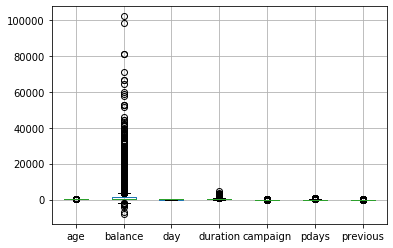

In [11]:
bank[num_col].boxplot()

### Imputation for Outlier

In [12]:
def outlier_treatment(x,data=bank):
    IQR=data[x].quantile(.75)-data[x].quantile(.25)
    upper_bound=data[x].quantile(.75) + (1.5 * IQR)
    lower_bound=data[x].quantile(.25) - (1.5 * IQR)
    data[x].clip(lower=np.round(lower_bound,0),upper=np.round(upper_bound,0),inplace=True)

In [13]:
for i in num_col:
    outlier_treatment(i,bank)

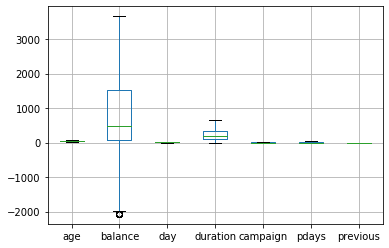

In [14]:
bank[num_col].boxplot()

In [15]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
Target       object
dtype: object

Since standard deviation for columns like pdays and previous is 0 , which means values contributing to the mean are identical and hence we would drop these columns as it won't explain lot in model.

In [16]:
bank.drop(['pdays','previous'],axis=1,inplace=True)

### Normalization

In [17]:
num_col=bank.select_dtypes(['int64','float64']).columns.values.tolist()

In [18]:
norm_data=pd.DataFrame(StandardScaler().fit_transform(bank[num_col]),columns=num_col)

In [19]:
norm_data.reset_index(inplace=True)

In [20]:
bank.reset_index(inplace=True)

In [21]:
Bank=bank.drop(num_col,axis=1)

In [22]:
Bank.drop('index',inplace=True,axis=1)
norm_data.drop('index',inplace=True,axis=1)

In [23]:
bank_norm=pd.concat([Bank,norm_data],axis=1)

In [24]:
bank_norm.head()

,job,marital,education,default,housing,loan,contact,month,Target,age,balance,day,duration,campaign
0,management,single,secondary,no,no,no,cellular,jul,no,-1.288590,-0.775759,-1.450883,0.097838,-0.875885
1,blue-collar,married,primary,no,no,no,cellular,jul,no,1.193013,-0.426659,-1.450883,0.333225,-0.875885
2,blue-collar,married,secondary,no,no,yes,cellular,jul,no,0.181989,-0.719060,-1.450883,2.305990,-0.253383
3,technician,single,secondary,no,no,no,telephone,jul,no,-0.920945,-0.788718,-1.450883,-0.967008,-0.253383
4,technician,single,secondary,no,yes,yes,cellular,jul,no,-1.288590,-0.702051,-1.450883,1.112243,0.991622


### Encoding

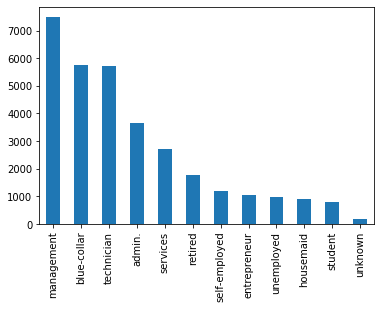

In [25]:
bank_norm.job.value_counts().plot(kind='bar')

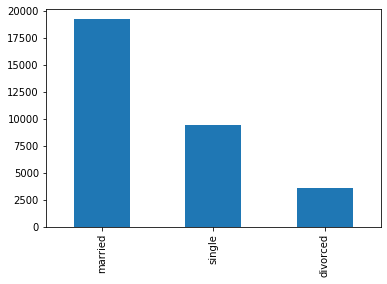

In [26]:
bank_norm.marital.value_counts().plot(kind='bar')

#### Label-Encoding

In [27]:
encode_dict={'Target':{'yes':1,'no':0},
             'contact':{'cellular':1,'telephone':0},
             'loan':{'yes':1,'no':0},
             'housing':{'yes':1,'no':0},'default':{'yes':1,'no':0}}

In [28]:
bank_norm.replace(encode_dict,inplace=True)

In [29]:
bank_norm.head()

,job,marital,education,default,housing,loan,contact,month,Target,age,balance,day,duration,campaign
0,management,single,secondary,0,0,0,1,jul,0,-1.288590,-0.775759,-1.450883,0.097838,-0.875885
1,blue-collar,married,primary,0,0,0,1,jul,0,1.193013,-0.426659,-1.450883,0.333225,-0.875885
2,blue-collar,married,secondary,0,0,1,1,jul,0,0.181989,-0.719060,-1.450883,2.305990,-0.253383
3,technician,single,secondary,0,0,0,0,jul,0,-0.920945,-0.788718,-1.450883,-0.967008,-0.253383
4,technician,single,secondary,0,1,1,1,jul,0,-1.288590,-0.702051,-1.450883,1.112243,0.991622


#### One-Hot Encoding

In [30]:
categ=bank_norm.select_dtypes('object')

In [31]:
categ_col=bank_norm.select_dtypes('object').columns.values

In [32]:
categ_data=pd.get_dummies(categ,drop_first=True)
categ_data

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32187,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32188,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32189,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
Final_Data=pd.concat([bank_norm.drop(categ_col,axis=1),categ_data],axis=1)

In [34]:
Final_Data.shape

(32191, 37)